In [1]:
relation_id = "per:religion"
# relation_id = "per:city_of_birth"
# relation_id = "per:country_of_birth"

In [3]:
from spike.pattern_generation.utils import GenerationFromSamples
from spike.generation.sample_annotator import SampleStringAnnotator
from spike.rest.definitions import Relation

import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'GenerationFromSamples' from 'spike.pattern_generation.utils' (/Users/matane/matan/dev/spike/server/spike/pattern_generation/utils.py)

In [3]:
from utils import read_file
triggers = read_file("../datasets/trigger_lists/SF_Resources/SF_Resources/trigger_dict_en/per_religion.xml", remove_duplicates=True)

In [4]:
file_path = "/Users/matane/matan/dev/datasets/generation_outputs/religion/annotated_filtered_ents_filtered_triggers_Mother-Teresa,-a-devoted-Catholic.txt"
# file_path = "/Users/matane/matan/dev/datasets/generation_outputs/country_of_birth/filtered_ents_filtered_triggers_Adele_was_born_in_England.txt"

with open(file_path) as f:
    text = f.read()

In [5]:
relation = Relation.fetch(id=relation_id)

ann_samples = []
for i, t in enumerate(text.split('\n')):
    if "[s" not in t:
        continue
    try:
        ann_sample = SampleStringAnnotator.annotate_sample_string(t)
        ann_sample.update_relation_data(relation)
        ann_samples.append(ann_sample)
    except:
        print(f"Failed on line {i}. Breaking")
        break

In [6]:
pattern_dict = GenerationFromSamples.gen_pattern_dict(ann_samples, triggers)

Couldn't create pattern: The node 17 is not in the graph.


In [7]:
out_patterns, out_simple_patterns, out_counts = GenerationFromSamples.prepare_patterns_for_display(pattern_dict)

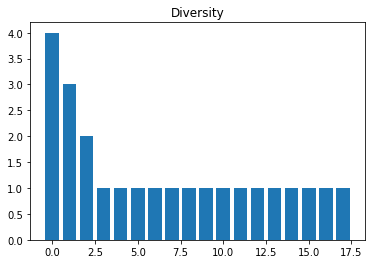

In [8]:
plt.bar(range(len(out_counts)), out_counts)
plt.title("Diversity")
plt.show()

In [9]:
idx=0

In [10]:
print(idx)
print(out_patterns[idx])
print(out_simple_patterns[idx])

0
| trigger=[ word=/reform|chapel|clergyman|president|orthodox|monastery|veteran|clergy|fan|# the following Matan added:|rev.|prophet|bishop|rabbi|sister|anglican|preacher|methodist|deity|faithful|synagogue|temple|church|mosque|sephardic|conservative|pastor|reverend|monk|secular|evangelical|served|Devout|converted|minister/ ]
  subject:Person=<appos
  object:Religion=>compound
<sample><s>Jill Eckert</s>, a <o>Methodist</o> <t>minister</t>, practiced in Marblehead, Mass.</sample>


In [11]:
sum(out_counts)

24

In [12]:
import re
text = "<sample>U.S. President <s>Barack Obama</s> was <t>born</t> in <o>Honolulu</o> on Tuesday.</sample>"


In [13]:
import re
def xml_to_simple(text):
    text = re.sub("<sample>", "", text)
    text = re.sub("</sample>", "", text)
    text = re.sub("<s>", "[s ", text)
    text = re.sub("<t>", "[t ", text)
    text = re.sub("<o>", "[o ", text)
    text = re.sub("</s>", "]", text)
    text = re.sub("</t>", "]", text)
    text = re.sub("</o>", "]", text)
    return text

import re
def xml_to_no_annotations(text):
    text = re.sub("<sample>", "", text)
    text = re.sub("</sample>", "", text)
    text = re.sub("<s>", "", text)
    text = re.sub("<t>", "", text)
    text = re.sub("<o>", "", text)
    text = re.sub("</s>", "", text)
    text = re.sub("</t>", "", text)
    text = re.sub("</o>", "", text)
    return text

In [14]:
for p, e in zip(out_patterns, out_simple_patterns):
    print(f"; {xml_to_no_annotations(e)}")
    print(f"; {xml_to_simple(e)}")
    print(p+'\n')

; Jill Eckert, a Methodist minister, practiced in Marblehead, Mass.
; [s Jill Eckert], a [o Methodist] [t minister], practiced in Marblehead, Mass.
| trigger=[ word=/reform|chapel|clergyman|president|orthodox|monastery|veteran|clergy|fan|# the following Matan added:|rev.|prophet|bishop|rabbi|sister|anglican|preacher|methodist|deity|faithful|synagogue|temple|church|mosque|sephardic|conservative|pastor|reverend|monk|secular|evangelical|served|Devout|converted|minister/ ]
  subject:Person=<appos
  object:Religion=>compound

; Gill, an Anglican minister who founded the MBIA `s Survivors'Health Care program, lost his faith in the days before he died in 2007.
; [s Gill], an [o Anglican] [t minister] who founded the MBIA `s Survivors'Health Care program, lost his faith in the days before he died in 2007.
| trigger=[ word=/reform|chapel|clergyman|president|orthodox|monastery|veteran|clergy|fan|# the following Matan added:|rev.|prophet|bishop|rabbi|sister|anglican|preacher|methodist|deity|faith